In [1]:
from typing import Dict, List, Tuple
import torch
import numpy as np
import gym
from plotly.subplots import make_subplots
from agent.DQN_Agent import DQNAgent
from environment.DiscreteEnvironment import DiscreteSimpleEnvironment

import pandas as pd

%load_ext autoreload
%autoreload 2

## Set environment and agent parameters

In [2]:
env = DiscreteSimpleEnvironment(param_list=['Tair', 'RH', 'Tmrt', 'Tout', 'Qheat', 'Occ'],
alpha=1,
beta=1,
min_temp=16,
max_temp=21,
discrete_action_dim=100,
modelname='CELLS_v1.fmu',
simulation_path=r'C:\Users\hbenoit\Desktop\DIET_Controller\EnergyPlus_simulations\simple_simulation',
days=151,
hours=24,
minutes=60,
seconds=60,
ep_timestep=6)

agent_arguments = {
"memory_size": [1000],
"batch_size": [32],
"actor_update":[8],
"target_update": [100],
"epsilon_decay": [1 / 20000],
"max_epsilon": [1],
"min_epsilon":  [0.0],
"lr":[1e-3,5e-3],
"gamma": [0.99],
"inside_dim": [128,256,512],
"num_hidden_layers": [6,7,8],
"seed": [800]
}


## Hyperparameter tuning and training

In [ ]:
from Performance import all_combinations_list
from Performance import search_similar

logging_path = r"C:\Users\hbenoit\Desktop\DIET_Controller\logs\simple_simulation"

for curr_agent_arguments in all_combinations_list(agent_arguments):

    searching_directory = r"C:\Users\hbenoit\Desktop\DIET_Controller\logs\simple_simulation\DQN_Agent\results"
    agent = DQNAgent(env).from_dict(dict_arguments=curr_agent_arguments)
    log_dict = {**agent.log_dict(), **env.log_dict()}
    num_episodes = 10
    log_dict["num_episodes"] = num_episodes

    ## so that we don't train a configuration that has already been trained
    if(not(search_similar(searching_directory, log_dict))):
        print("WE TRAIN")
        results_path, summary_df = agent.train(logging_path= logging_path, num_episodes=num_episodes,log=True)
  

# Finding the best performing agent in the logs

In [1]:
# Example of how to use the function: 
import Performance

searching_directory = r"C:\Users\hbenoit\Desktop\DIET_Controller\logs\simple_simulation\DQN_Agent"

conditions = {"seed":["=",800],    "alpha":["=",1],
    "beta":["=",1], "num_episodes":["=",10]}

path_list = Performance.search_paths(searching_directory,conditions=conditions, top_k=2, utility_function=Performance.cumulative_reward,normalized=True)

path_list

['C:\\Users\\hbenoit\\Desktop\\DIET_Controller\\logs\\simple_simulation\\DQN_Agent\\results\\2022_6_15\\results_2022_6_15_19_4',
 'C:\\Users\\hbenoit\\Desktop\\DIET_Controller\\logs\\simple_simulation\\DQN_Agent\\results\\2022_6_15\\results_2022_6_15_19_13']

In [ ]:
path_list

# Testing performance pipeline

Iteration0
Iteration1000
Iteration2000
Iteration3000
Iteration4000
Iteration5000
Iteration6000
Iteration7000
Iteration8000
Iteration9000
Iteration10000
Iteration11000
Iteration12000
Iteration13000
Iteration14000
Iteration15000
Iteration16000
Iteration17000
Iteration18000
Iteration19000
Iteration20000
Iteration21000
Iteration0
Iteration1000
Iteration2000
Iteration3000
Iteration4000
Iteration5000
Iteration6000
Iteration7000
Iteration8000
Iteration9000
Iteration10000
Iteration11000
Iteration12000
Iteration13000
Iteration14000
Iteration15000
Iteration16000
Iteration17000
Iteration18000
Iteration19000
Iteration20000
Iteration21000
Iteration0
Iteration1000
Iteration2000
Iteration3000
Iteration4000
Iteration5000
Iteration6000
Iteration7000
Iteration8000
Iteration9000
Iteration10000
Iteration11000
Iteration12000
Iteration13000
Iteration14000
Iteration15000
Iteration16000
Iteration17000
Iteration18000
Iteration19000
Iteration20000
Iteration21000
Iteration0
Iteration1000
Iteration2000
Iteration3

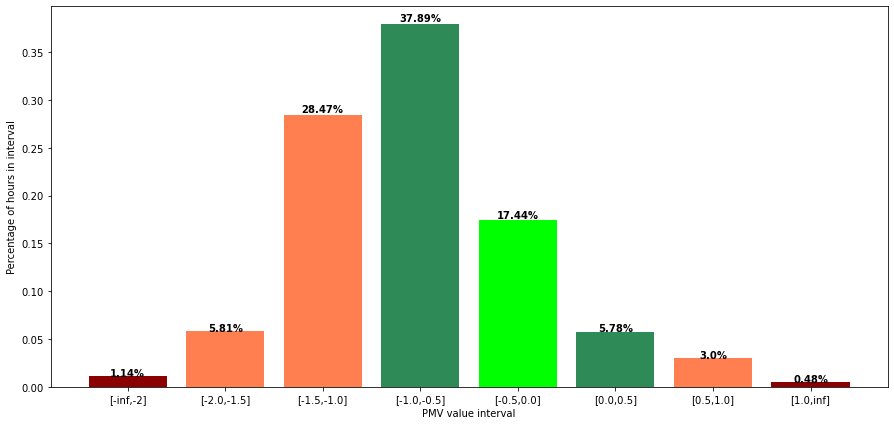

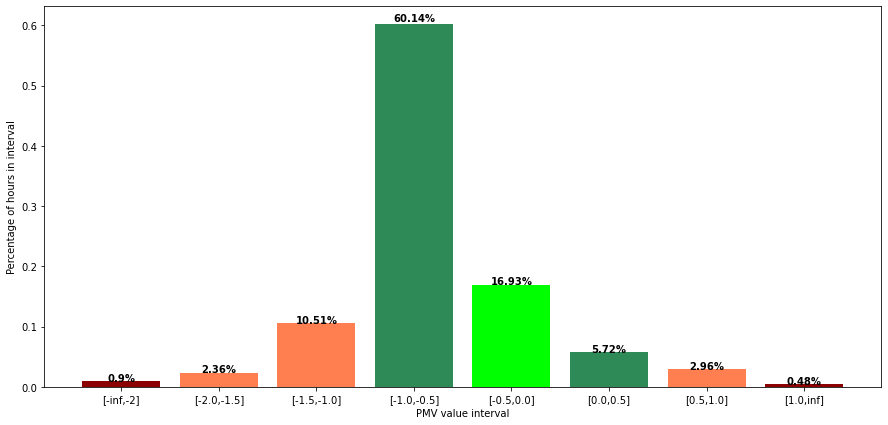

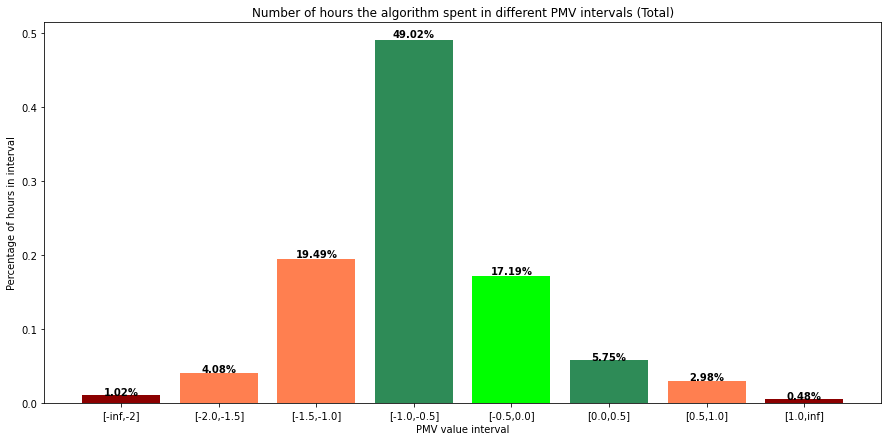

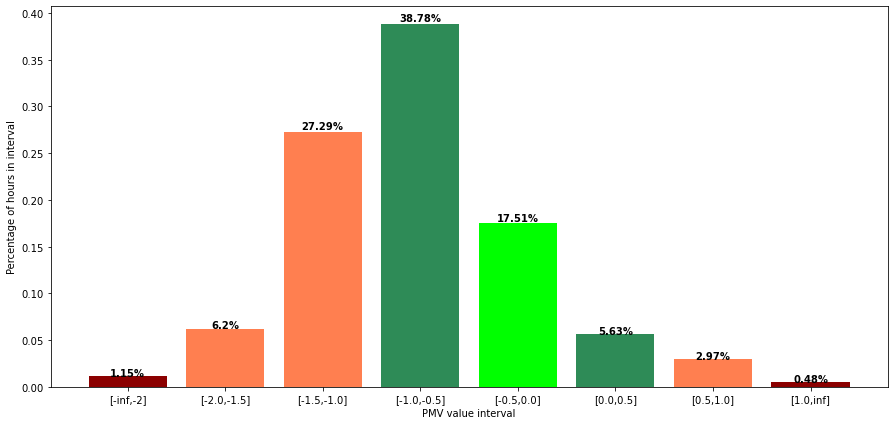

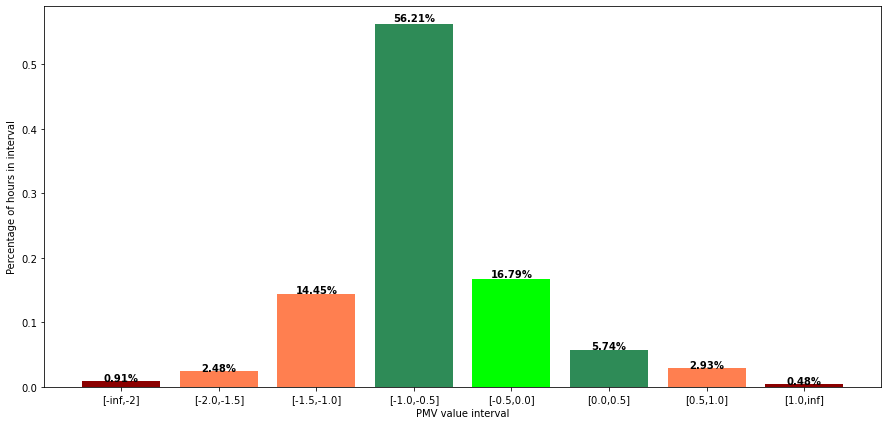

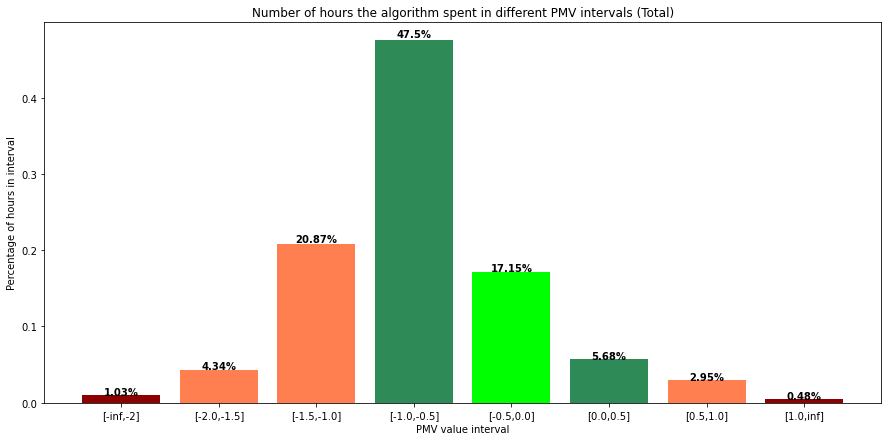

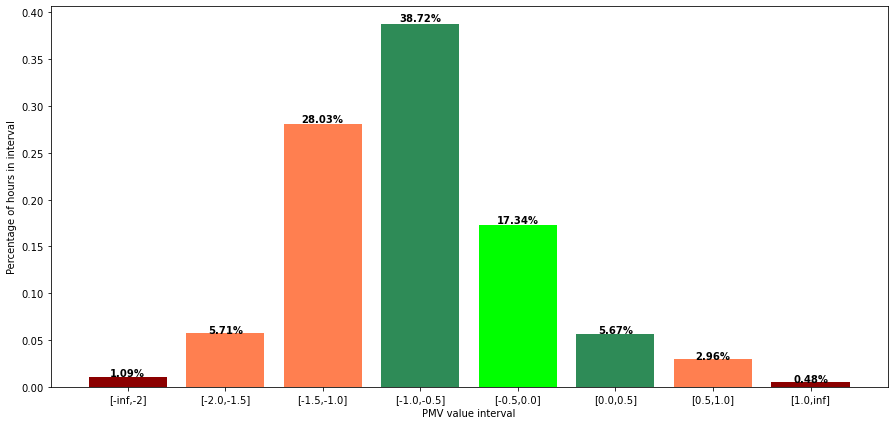

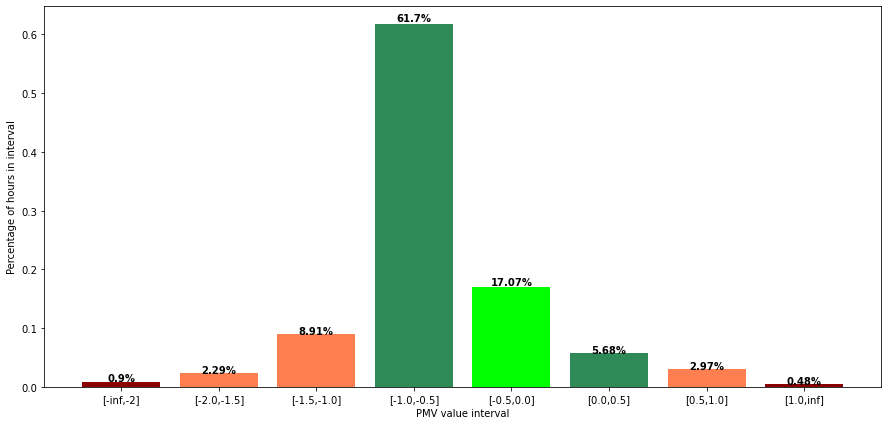

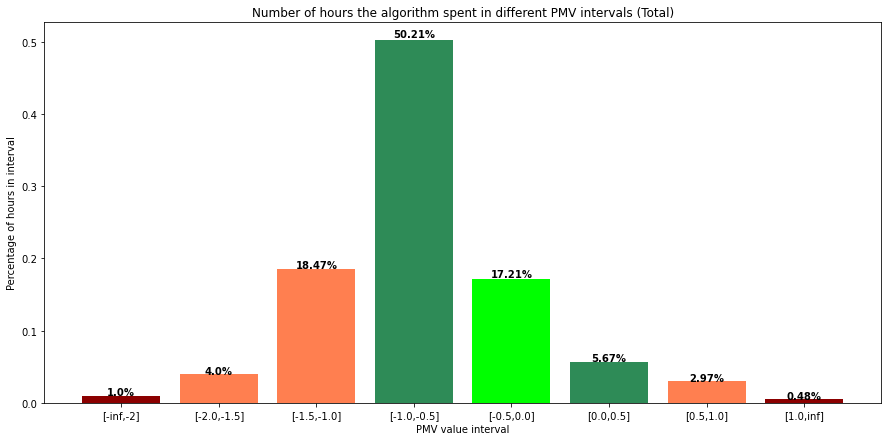

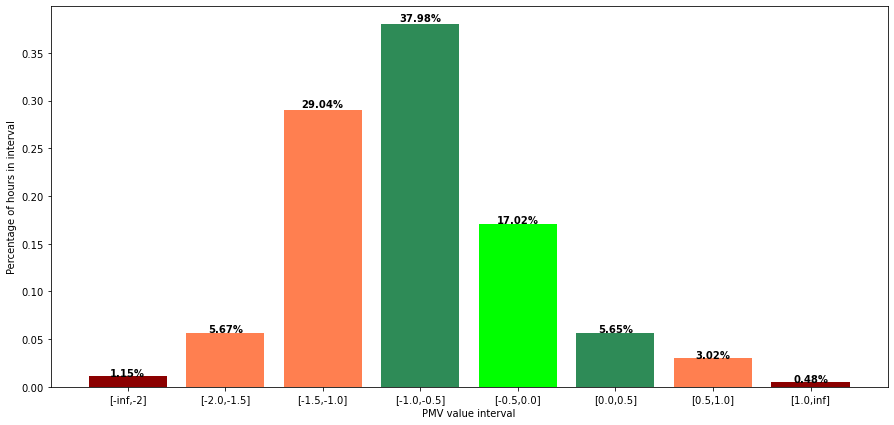

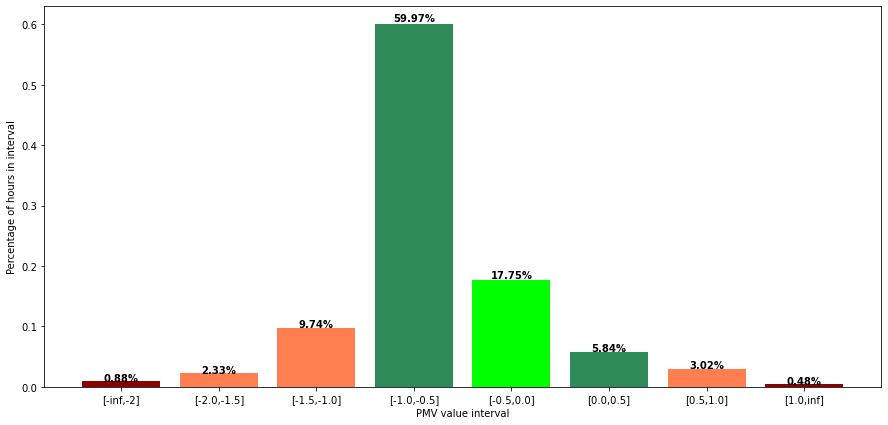

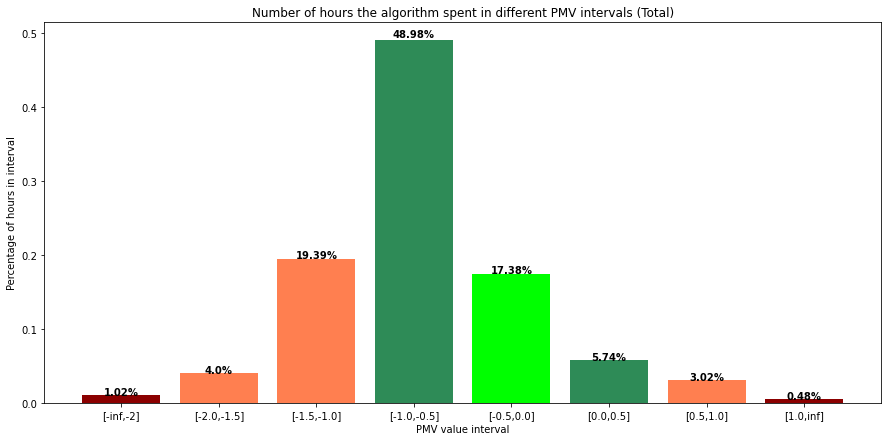

In [5]:
import Performance
from logger.SimpleLogger import SimpleLogger

env = DiscreteSimpleEnvironment(param_list=['Tair', 'RH', 'Tmrt', 'Tout', 'Qheat', 'Occ'],
alpha=1,
beta=1,
min_temp=16,
max_temp=21,
discrete_action_dim=100,
modelname='CELLS_v1.fmu',
simulation_path=r'C:\Users\hbenoit\Desktop\DIET_Controller\EnergyPlus_simulations\simple_simulation',
days=151,
hours=24,
minutes=60,
seconds=60,
ep_timestep=6)

best_agent_path = 'C:\\Users\\hbenoit\\Desktop\\DIET_Controller\\logs\\simple_simulation\\DQN_Agent\\results\\2022_6_15\\results_2022_6_15_19_4'

agent= Performance.load_trained_agent(DQNAgent(env), results_path=best_agent_path)

parameter = ("seed", [775,776,777,778])

logging_path = r"C:\Users\hbenoit\Desktop\DIET_Controller\logs\simple_simulation"

utility_function = Performance.cumulative_reward
agent = DQNAgent(env=env)
num_episodes = 2
num_iterations = env.numsteps
agent_name = "DQN_Agent"

results_dict = Performance.across_runs(agent=agent, parameter=parameter,
    logging_path=logging_path, num_episodes=num_episodes, num_iterations=num_iterations, utility_function=utility_function,alpha=0.05)

logger = SimpleLogger(
        logging_path=logging_path,
        agent_name="DQN_Agent",
        num_episodes=num_episodes,
        num_iterations=num_iterations,
    )

logger.log_performance_pipeline(results_dict)